In [1]:
import numpy as np
import matplotlib.pyplot as plt
#plt.rcParams['figure.figsize'] = [12, 12]
#from skimage.data import camera
from skimage.filters import gaussian, median
from skimage.filters.rank import mean
from skimage.io import imread
from skimage.feature import canny
from skimage.util import random_noise
from skimage.morphology import disk
from scipy.signal import correlate2d
from scipy.ndimage import gaussian_filter
from scalespace import gaussian_scalespace, structure_tensor, determinant_symmetric_field, trace_symmetric_field

import skimage
from skimage import io

#reference his code from lecture in end. 

In [2]:
lenna = io.imread("/Users/rachelrea/Documents/IT and Cognition/Vision and Image Processing/Assignment 2/lenna.jpg")


Text(0.5, 0.98, 'Gaussian')

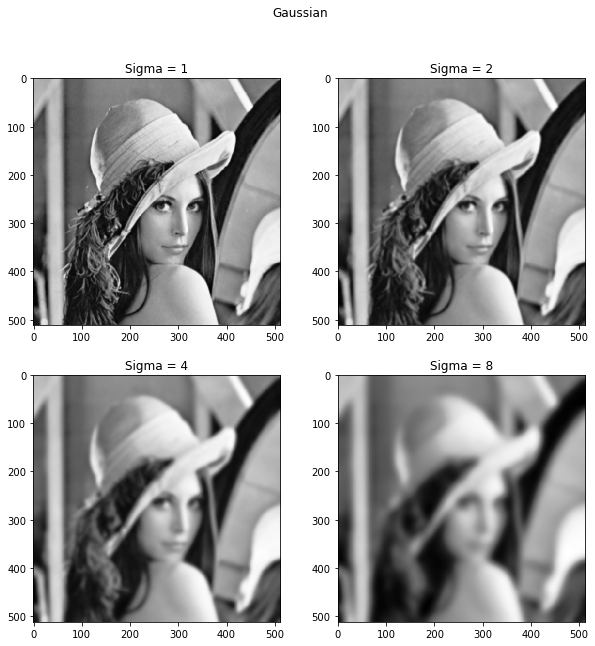

In [3]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(10, 10)
for i in range(4):
    sigma = 2**(i)
    fglenna = gaussian(lenna, sigma=sigma)
    ax = axes[i//2, i%2]    
    ax.imshow(fglenna,cmap='Greys_r',interpolation='none')
    ax.set_title(f"Sigma = {sigma}")
fig.suptitle('Gaussian')



As sigma increases, there is more blur, at the cost of losing detail. The area taken to average increases with increasing sigma.

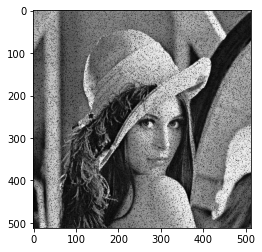

In [4]:
# Add random black noise in lenna image
lenna_noise = random_noise(lenna, 'pepper', amount=0.11)
plt.imshow(lenna_noise, cmap='Greys_r')
plt.show()

Text(0.5, 0.98, 'Gaussian vs. Salt and Pepper')

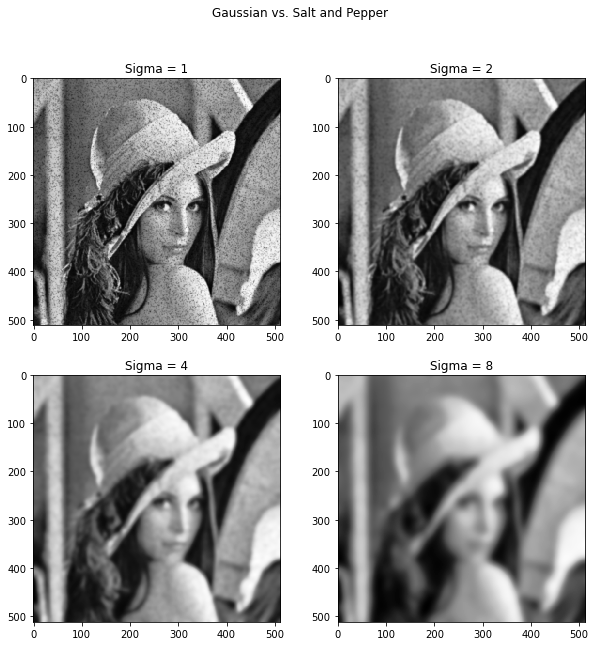

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(10, 10)
for i in range(4):
    sigma = 2**(i)
    fglenna_noise = gaussian(lenna_noise, sigma=sigma)
    ax = axes[i//2, i%2]    
    ax.imshow(fglenna_noise,cmap='Greys_r',interpolation='none')
    ax.set_title(f"Sigma = {sigma}")
fig.suptitle('Gaussian vs. Salt and Pepper')

The Gaussian filter reduces the salt and pepper noise, but at the cost of also losing detail (median filter would be more appropriate for less loss of detail). 
We can see detail being lost in an orderly fashion as sigma increases, with local minima and maxima meeting and annihilating. This is unique to the Gaussian filter (Olsen 2021, slide 44).

Text(0.5, 0.98, 'Gaussian vs. Small Disk')

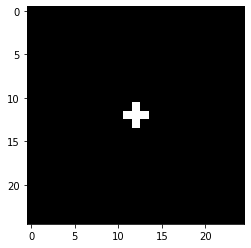

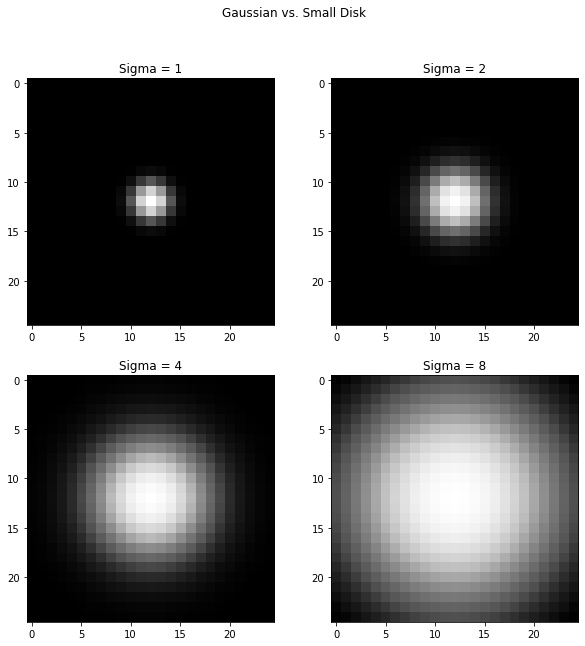

In [12]:
d1 = np.array(disk(1))

D1 = np.zeros((25,25))

D1[11:14,11:14]=d1

plt.imshow(D1,cmap='Greys_r') #small cross to experiment with

fig, axes = plt.subplots(nrows=2, ncols=2) #plots applying Gaussian filter with increasing sigma value
fig.set_size_inches(10, 10)
for i in range(4):
    sigma = 2**(i)
    fgd1 = gaussian(D1, sigma=sigma)
    ax = axes[i//2, i%2]    
    ax.imshow(fgd1,cmap='Greys_r',interpolation='none')
    ax.set_title(f"Sigma = {sigma}")
fig.suptitle('Gaussian vs. Small Disk')



As sigma increases, we can see the effect of a stronger weighting of pixels at the center and of its close neighbors, much more strongly than its distant neighbors. 
When the standard deviation/sigma is small, the size of the blob does not increase much as the weights for the center pixels are also small. 
As sigma increases, the neighbouring pixel weights increases. Meaning the average tends towards the values of the neighbouring white pixels, increasing the appearance of a white blob. (Forsyth & Ponce 2011, p. 110)

References:
<br>
Olsen, S. I., 2021, _Lecture 3: Vision and Image Processing 2021-2022 Filtering and edges, Basic image processing_, Vision and Image Processing NDAK12002U, The University of Copenhagen, delivered Monday 29th November 2021.
<br>
Forsyth, D., & Ponce, J. (2011). _Computer vision: A modern approach_ (p. 792). Prentice hall.
<br>
<br>
Code taken from:
<br>
Olsen, S. I., 2021, _Lecture 3: filterededges.ipynb, Vision and Image Processing NDAK12002U, The University of Copenhagen, delivered Monday 29th November 2021.
        reference his code from class